In [1]:
import time

import gym
import gym_snake
from ml_tools import q_learning

import matplotlib.pyplot as plt

In [2]:
from brain.snake_v3.brain import Brain

brain = Brain()
brain.extend_old_model = True

In [3]:
agent = q_learning.Agent(
  action_space=[0, 1, 2, 3],

  brain=brain,

#   epsilon=1,
  epsilon=0.3,
  epsilon_decay=0.999995,
  
  discount_factor=0.97,
  
  replay_batch_size=32,
  model_batch_size=16,
  
  model_learning_rate=0.001,

  steps_to_train=10,
  steps_to_update_target=25,

  replay_memory_max_len=50_000,
  replay_memory_min_len= 2_000,
)

env = gym.make('snake-v0')

score = 0
scores = []
game_num = 0

test


In [5]:
 brain.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 31, 31, 64)        12352     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 7, 7, 64)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 4, 32)          32800     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 256)               3

In [ ]:
from ml_tools.ui import UI

ui = UI()
ui.connect("./public")
brain.ui = ui

raw_observation = env.reset()
agent.reset(raw_observation)

while True:
  ui.video.update_stream("raw", raw_observation)

  speed = int(ui.control.get_value('speed') or 100)
  if speed != 100:
    time.sleep(1 / speed)
    
  action = agent.act()
  raw_next_observation, reward, done, info = env.step(action)
  agent.step(reward, raw_next_observation)
  score += reward

  raw_observation = raw_next_observation
  if done:
    scores.append(score)
    score = 0

    game_num += 1

    raw_observation = env.reset()
    agent.reset(raw_observation)

2/2 [==============================] - 0s 4ms/step - loss: 0.0171


Exception in thread Thread-7 (start_reading_loop):
Traceback (most recent call last):
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.10/threading.py", line 1009, in _bootstrap_inner
    self.run()
  File "/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.10/threading.py", line 946, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/wiktorjurkiewicz/repos/00_PROJECTS/@_@_GENERAL/04_CODE/ML/ml_tools/ml_tools/ui/service/services.py", line 23, in start_reading_loop
    message = self.protocol.Read()
  File "/Users/wiktorjurkiewicz/repos/00_PROJECTS/@_@_GENERAL/04_CODE/ML/ml_tools/ml_tools/ui/protocol.py", line 35, in Read
    return self.decoder.Read()
  File "/Users/wiktorjurkiewicz/repos/00_PROJECTS/@_@_GENERAL/04_CODE/ML/ml_tools/ml_tools/ui/protocol.py", line 51, in Read
    n = d.r.recv_into(d.readBuffer)
ConnectionResetError: [Errno 54] Connection reset by peer


2/2 [==============================] - 0s 3ms/step - loss: 0.0136


2/2 [==============================] - 0s 4ms/step - loss: 0.0073


2/2 [==============================] - 0s 3ms/step - loss: 0.0059


2/2 [==============================] - 0s 4ms/step - loss: 0.0063


2/2 [==============================] - 0s 3ms/step - loss: 0.0125


2/2 [==============================] - 0s 3ms/step - loss: 0.0079


1/2 [==============>...............] - ETA: 0s - loss: 0.0076

In [18]:
brain.save_model()

INFO:tensorflow:Assets written to: /Users/wiktorjurkiewicz/repos/00_PROJECTS/@_@_GENERAL/04_CODE/ML/snake-deep-q-learning/brain/snake_v2/model/assets


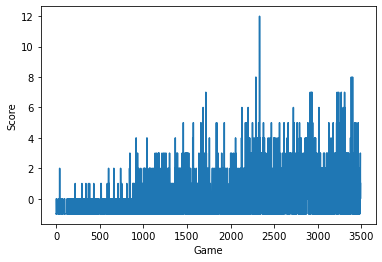

In [10]:
plt.plot(scores)
plt.xlabel("Game")
plt.ylabel("Score")
plt.savefig('plt.jpg')
plt.show()

In [43]:
agent.epsilon = 0.0005